# flats-in-cracow exploratory data analysis

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from pylab import rcParams
from pathlib import Path

## Setup

In [2]:
# Create directory for images 
Path("img").mkdir(parents=True, exist_ok=True)

# Set default figure size
rcParams['figure.figsize'] = (4, 4)

# Tell pandas how to display floats
pd.options.display.float_format = "{:,.2f}".format

## Data loading

In [3]:
path = '../flats-data/cleaned_data.csv'

In [4]:
data = pd.read_csv(path, lineterminator='\n')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   District   4659 non-null   object
 1   Amount     4659 non-null   int64 
 2   Seller     4659 non-null   object
 3   Area       4659 non-null   int64 
 4   Rooms      4659 non-null   int64 
 5   Bathrooms  4659 non-null   int64 
 6   Parking    4659 non-null   object
 7   Garden     4659 non-null   bool  
 8   Balcony    4659 non-null   bool  
 9   Terrace    4659 non-null   bool  
 10  Basement   4659 non-null   bool  
 11  New        4659 non-null   bool  
 12  Block      4659 non-null   bool  
 13  Townhouse  4659 non-null   bool  
 14  Apartment  4659 non-null   bool  
 15  Bus stops  4659 non-null   bool  
 16  Studio     4659 non-null   bool  
dtypes: bool(10), int64(4), object(3)
memory usage: 300.4+ KB


In [6]:
data.head()

,District,Amount,Seller,Area,Rooms,Bathrooms,Parking,Garden,Balcony,Terrace,Basement,New,Block,Townhouse,Apartment,Bus stops,Studio
0,biezanow,350064,realtor,49,3,1,garage,False,True,False,False,True,False,False,False,False,False
1,pradnik czerwony,445920,realtor,46,2,1,garage,False,True,True,False,False,False,False,False,False,False
2,debniki,375000,realtor,52,2,1,street,False,True,False,False,False,False,False,False,False,False
3,biezanow,284700,realtor,39,2,1,garage,False,True,False,False,True,False,False,False,False,False
4,biezanow,381192,realtor,46,2,1,covered,True,False,False,False,True,False,False,True,False,False


## Numeric features

To visually inspect the data we are going to make histograms for each of the numeric columns.

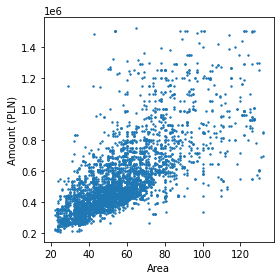

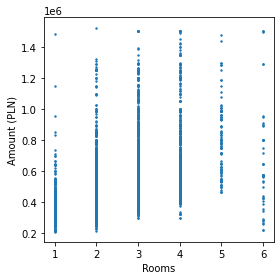

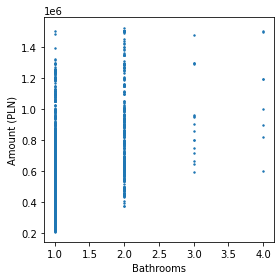

In [7]:
numeric = list(data.select_dtypes('number').columns)    
for col in numeric:
    if col != 'Amount':
        plt.scatter(data[col], data['Amount'], s=2)
        plt.xlabel(f'{col}')
        plt.ylabel(f'Amount (PLN)')
        plt.tight_layout()
        plt.show()

In [8]:
data.select_dtypes('number').corr()

,Amount,Area,Rooms,Bathrooms
Amount,1.00,0.71,0.46,0.43
Area,0.71,1.00,0.74,0.49
Rooms,0.46,0.74,1.00,0.37
Bathrooms,0.43,0.49,0.37,1.00


## Binary features

We are going to group the data and compare averages.

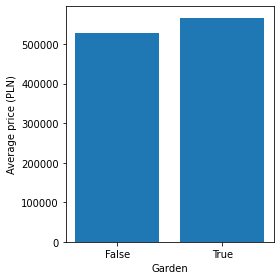

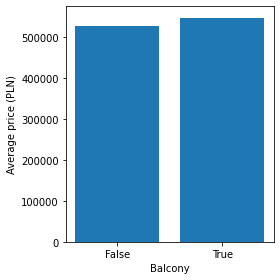

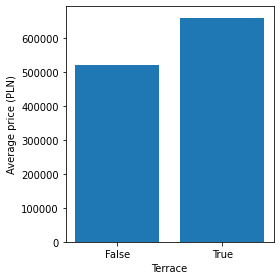

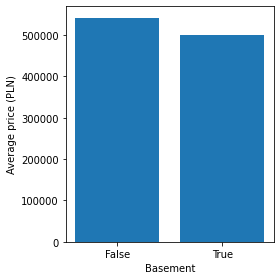

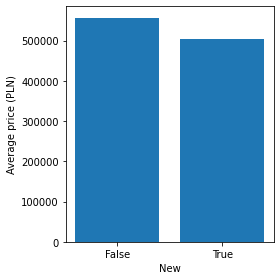

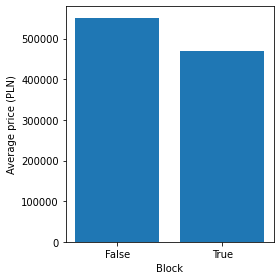

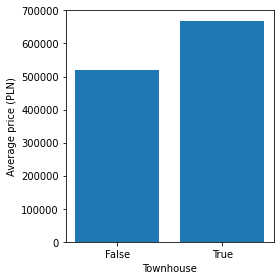

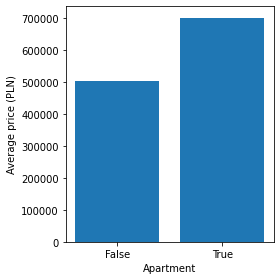

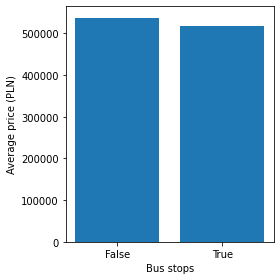

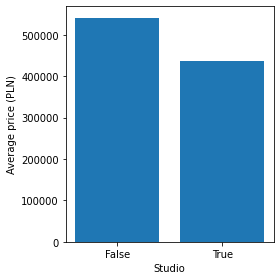

In [9]:
binary = list(data.select_dtypes(bool).columns)    
for col in binary:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)
    plt.bar(group[col], height=group['Amount'])
    plt.xticks(ticks=group[col].to_list(),
               labels=group[col].to_list())
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.tight_layout()
    plt.show()

We check correlation of binary columns with `Amount`.

In [10]:
C = data[binary].corrwith(data['Amount'])
C.name = 'Correlation'
C = C.to_frame()
C = C.sort_values('Correlation', ascending=False)
C = C.reset_index()
C = C.rename(columns={'index': 'Column'})
C

,Column,Correlation
0,Apartment,0.33
1,Townhouse,0.19
2,Terrace,0.19
3,Garden,0.07
4,Balcony,0.05
5,Bus stops,-0.03
6,Basement,-0.07
7,Studio,-0.11
8,New,-0.12
9,Block,-0.15


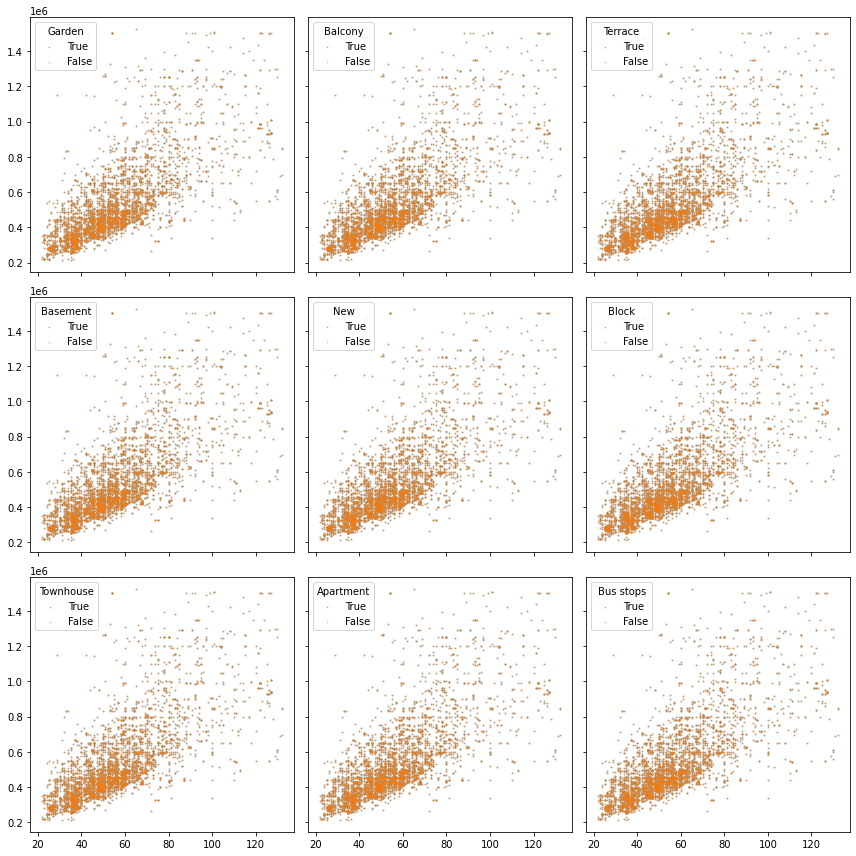

In [11]:
n, m = 3,3

def plot_scatter_by_binary(col, ax):
    for val in [True, False]:
        tmp = data[data[col] == val].copy()
        ax.scatter(data['Area'], data['Amount'], s=1, label=val, alpha=1/3)
    ax.legend(title=f'{col}', loc='upper left')


fig, ax = plt.subplots(n, m, figsize=(12,12), sharex=True, sharey=True)

k = 0
for i in range(n):
    for j in range(m):
        plot_scatter_by_binary(binary[k], ax=ax[i, j])
        k += 1
        
plt.tight_layout()
plt.show()

## Categorical features

Again, we group the rows and compare averages.

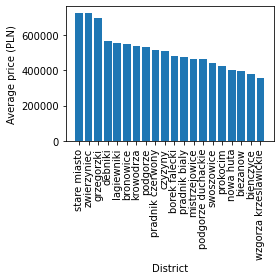

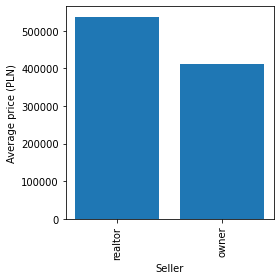

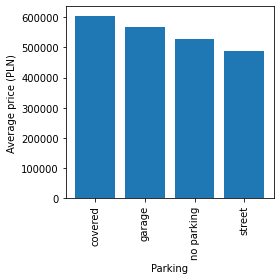

In [12]:
categorical = list(data.select_dtypes('object').columns)    
for col in categorical:
    group = data[[col, 'Amount']]
    group = group.groupby([col], as_index=False)
    group = group.mean()
    group = group.sort_values('Amount', ascending=False)

    plt.bar(group[col], group['Amount'])
    plt.ylabel('Average price (PLN)')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.savefig(f'img/feature_{col.lower()}.png')
    plt.show()    